In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (20, 10) # set default size of plots
plt.rcParams.update({'font.size': 20})

In [17]:
df = pd.read_csv('ozonzono.csv', index_col=0)
df = df.rename(columns={'Race Number': 'race_number'})
df = df.rename(columns={col:col.lower() for col in df.columns})
df = df.reset_index().drop('index', axis=1)
df.speed = df.speed.apply(lambda x: int(x.split(' ')[0]))
df['timestamp'] = df.date.apply(pd.Timestamp)
df['accuracy'] = df.accuracy.apply(lambda x: float(x[:-1]))
df

,accuracy,author,date,full_text,genre,opponents,participants,race_number,racer,rank,speed,title,errors,timestamp
0,93.8,Garret Keizer,"Sat, 22 Dec 2018 18:19:52 +0000","It is always important, I think, to be clear a...",book,NaN,5,1,Liad (ozonzono),4,30,World Enough and Time,"[('think,', ' instead of ,'), ('clear', 'k ins...",2018-12-22 18:19:52+00:00
1,93.5,Wendelin Van Draanen,"Sat, 22 Dec 2018 18:21:21 +0000","A million dollars sounds like a lot, I know. E...",book,dakid02 (3rd place),5,2,Liad (ozonzono),4,28,Sammy Keyes and the Dead Giveaway,"[('million', 'o instead of i'), ('know.', 'i i...",2018-12-22 18:21:21+00:00
2,93.6,James Joyce,"Sat, 22 Dec 2018 18:22:31 +0000","Yes, it was her he was looking at, and there w...",book,howtokillamokingbird (2nd place),5,3,Liad (ozonzono),3,34,Ulysses,"[('Yes,', '. instead of ,'), ('was', 'a instea...",2018-12-22 18:22:31+00:00
3,93.5,"John F. Hughes, Andries van Dam, James D. Fole...","Sat, 22 Dec 2018 18:24:32 +0000",The process of determining what pixels should ...,book,NaN,4,4,Liad (ozonzono),3,31,Computer Graphics: Principles and Practice,"[('process', 's instead of c'), ('determining'...",2018-12-22 18:24:32+00:00
4,93.7,Dan Harris,"Sat, 22 Dec 2018 18:26:15 +0000","Look at the stars. Same stars as last week, la...",movie,NaN,5,5,Liad (ozonzono),4,33,Imaginary Heroes,"[('Same', 's instead of S'), ('as', ' instead ...",2018-12-22 18:26:15+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,96.1,Lynne Truss,"Tue, 15 Oct 2019 09:17:29 +0000","Meanwhile, lawyers eschew the comma as far as ...",book,kookie_mazookie (2nd place),5,5736,Liad (ozonzono),4,65,"Eats, Shoots & Leaves: The Zero Tolerance Appr...","[('Meanwhile,', ', instead of l'), ('comma', '...",2019-10-15 09:17:29+00:00
5735,95.5,J.K. Rowling,"Tue, 15 Oct 2019 09:18:30 +0000","You are the true master of death, because the ...",book,kookie_mazookie (2nd place) lemoninapie (3rd p...,5,5737,Liad (ozonzono),5,65,Harry Potter and the Deathly Hallows,"[('are', 't instead of t'), ('true', 'u instea...",2019-10-15 09:18:30+00:00
5736,96.8,Adrian Lyne,"Tue, 15 Oct 2019 09:20:32 +0000",The only thing that burns in hell is the part ...,movie,sinkingecstasies (5th place) vizt (1st place) ...,5,5738,Liad (ozonzono),3,73,Jacob's Ladder,"[('burns', 's instead of n'), (""won't"", 'e ins...",2019-10-15 09:20:32+00:00
5737,95.4,Smashing Pumpkins,"Tue, 15 Oct 2019 09:21:34 +0000","That we don't even care as restless as we are,...",song,verdienste (1st place),5,5739,Liad (ozonzono),4,70,1979,"[('as', ' instead of s'), ('we', 'a instead of...",2019-10-15 09:21:34+00:00


# WPM And Accuracy Across Time

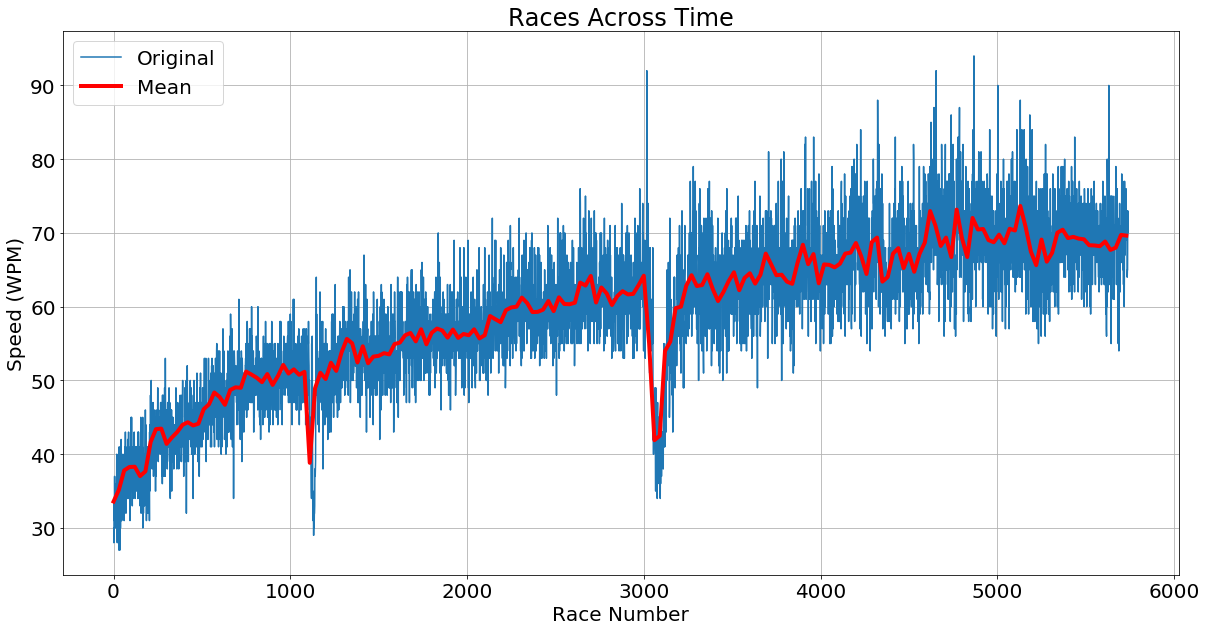

In [36]:
N = 30
mean_df = df.groupby(df.race_number // N)['speed'].mean().reset_index()
mean_df['sample_number'] = mean_df.race_number * N

plt.plot(df.race_number, df.speed, label='Original')
plt.plot(mean_df.sample_number, mean_df.speed, color='r', linewidth=4, label='Mean')
plt.title('Races Across Time')
plt.xlabel('Race Number')
plt.ylabel('Speed (WPM)')
plt.legend()
plt.grid(True)
plt.show()

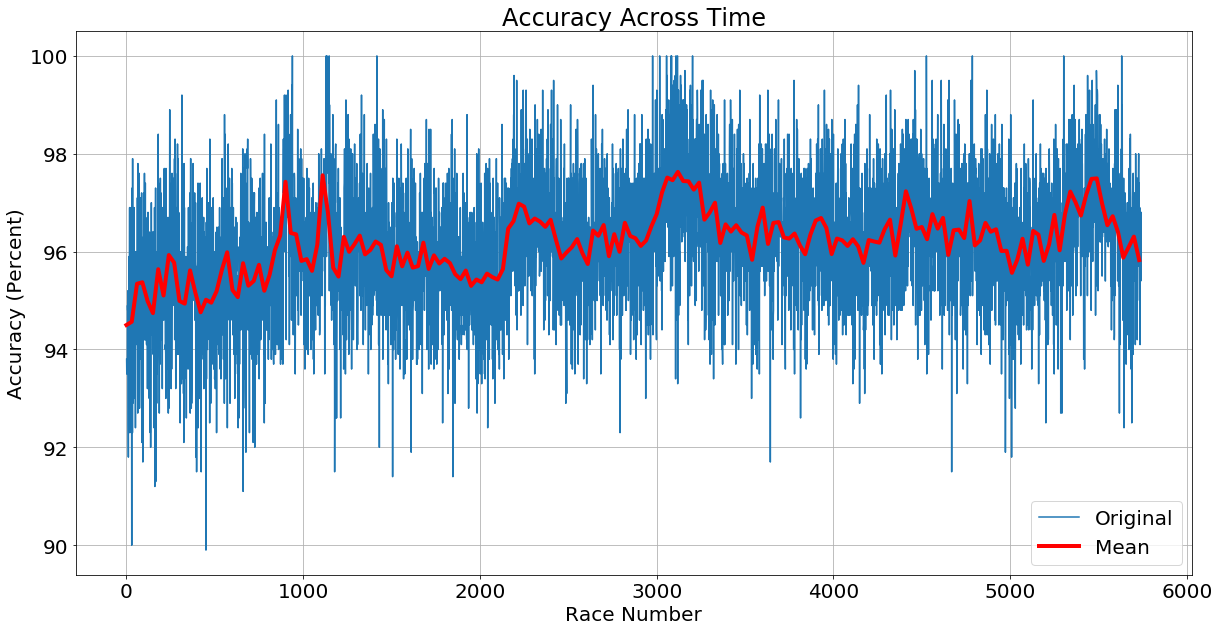

In [35]:
N = 30
mean_df = df.groupby(df.race_number // N).accuracy.mean().reset_index()
mean_df['sample_number'] = mean_df.race_number * N

plt.plot(df.race_number, df.accuracy, label='Original')
plt.plot(mean_df.sample_number, mean_df.accuracy, color='r', linewidth=4, label='Mean')
plt.title('Accuracy Across Time')
plt.xlabel('Race Number')
plt.ylabel('Accuracy (Percent)')
plt.legend()
plt.grid(True)
plt.show()

# Texts Breakdown

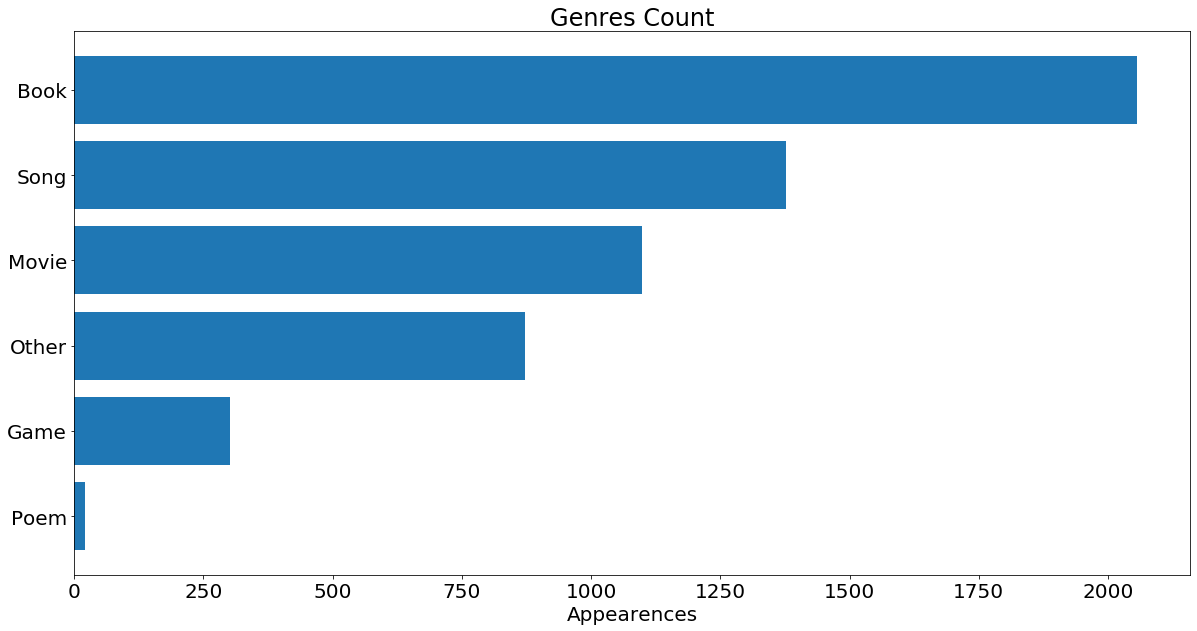

In [20]:
genre_s = df.genre.value_counts().sort_values()
genre_s = genre_s[genre_s > 5].reset_index()
genre_s['genre_name'] = genre_s['index'].apply(lambda x: x.capitalize())
plt.barh(genre_s.genre_name, genre_s.genre)
plt.title('Genres Count')
plt.xlabel('Appearences')
plt.show()

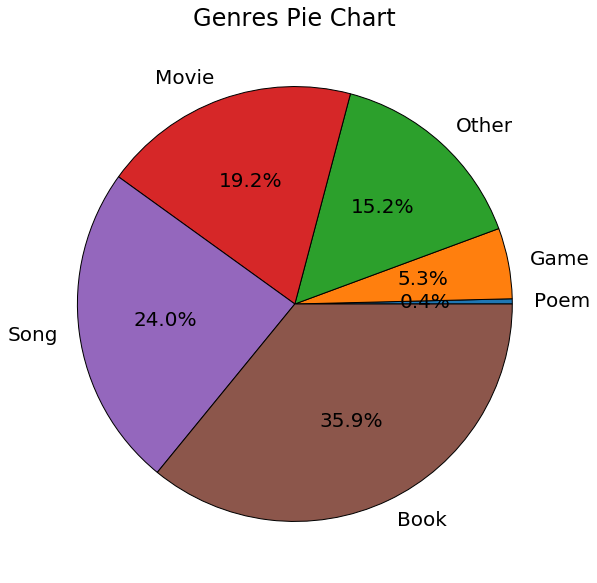

In [21]:
plt.pie(genre_s.genre, labels=genre_s.genre_name, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Genres Pie Chart')
plt.show()

In [22]:
def append_title_count(original_df, titles, last_race):
    # Finding the top values in the first number of races
    filtered = df[(df.title.isin(titles.columns)) & (df.race_number < last_race)].title.value_counts()
    # Creating a dataframe which would be appended taking the values from the filtered dataframe
    app = titles.copy().iloc[0]
    for col in app.index:
        try:
            app[col] = filtered[col]
        except:
            app[col] = 0
    return titles.append(app)
    
# The dataframe with the titles that appear the most
titles = df.title.value_counts().head(5).to_frame().transpose().reset_index().drop('index', axis=1)
for x in range(df.shape[0] // 100):
    titles = append_title_count(df, titles, x * 100)

# Moving the first entry to last
titles = titles.apply(np.roll, shift=-1).reset_index().drop('index', axis=1)

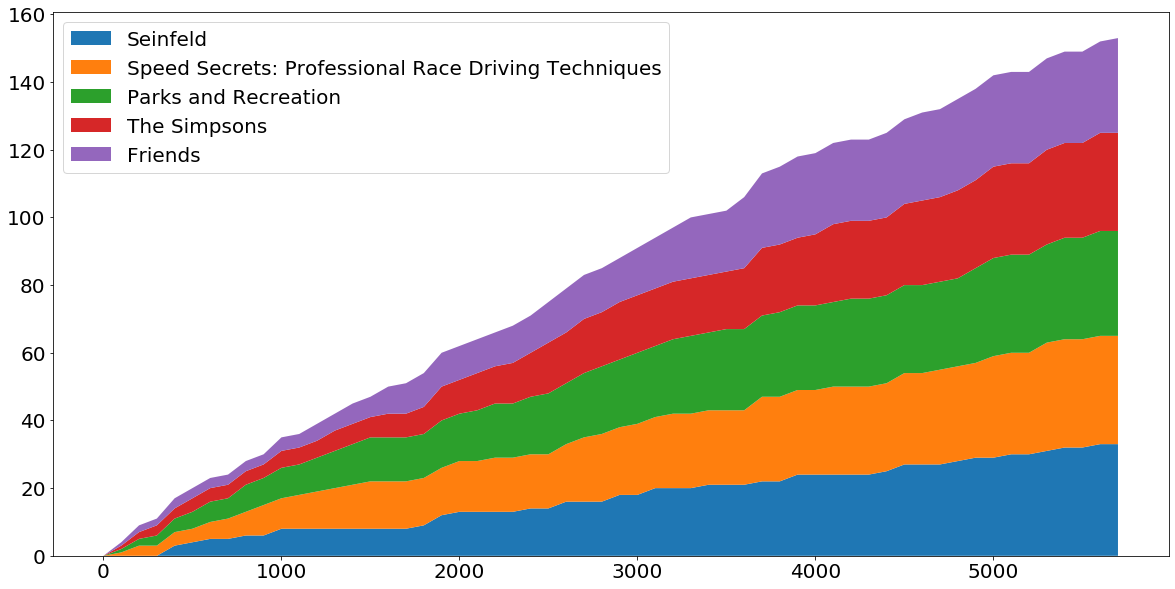

In [23]:
plt.stackplot([x * 100 for x in titles.index], [titles[x] for x in titles.columns], labels=[x for x in titles.columns])
plt.legend(loc='upper left')
plt.show()

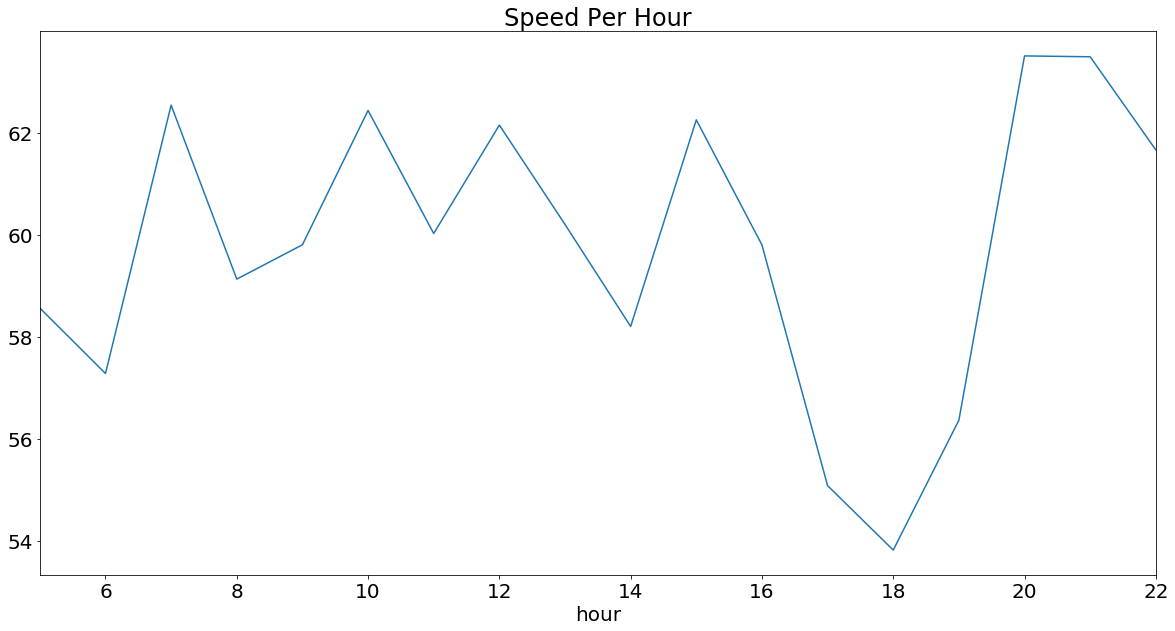

In [24]:
df['hour'] = df.timestamp.dt.hour
df.groupby('hour')['speed'].mean().plot(title='Speed Per Hour')

# Fingers Typing Distance

In [25]:
DISTANCE_KEYS = [None] * 5
DISTANCE_KEYS[0] = {'a', 's', 'e', 'f', 'j', 'i', 'l', ';', ' '}
DISTANCE_KEYS[1] = {'q', 'w', 'd', 'r', 't', 'y', 'u', 'o', 'p', '[',
                     'g', 'h', 'k', "'", 'z', 'x', 'v', 'b', 'n', 'm', ',', '.', '/', '8', '3'}
DISTANCE_KEYS[2] = {']', '\\', ',', 'c', '`', '1', '2', '4', '5', '6', '7', '9', '0', '-', '=',
                    'A', 'S', 'E', 'F', 'J', 'I', 'L', ':'}
DISTANCE_KEYS[3] = {'Q', 'W', 'D', 'R', 'T', 'Y', 'U', 'O', 'P', '{',
                     'G', 'H', 'K', '"', 'Z', 'X', 'V', 'B', 'N', 'M', '<', '>', '?', '*', '#'}
DISTANCE_KEYS[4] = {'}', '|', '<', 'C', '~', '!', '@', '$', '%', '^', '&', '(', ')', '_', '+'}
# Distance in m
KEYS_DISTANCE = 0.016

In [26]:
def key_distance(char):
    for i, option in enumerate(DISTANCE_KEYS):
        if char in option:
            return i

def distance_traveled(text):
    distance = 0
    for char in text:
        distance += key_distance(char) * KEYS_DISTANCE
    return distance

df['distance'] = df.full_text.apply(distance_traveled)
print(df.distance.sum() / 1000, 'km')

13.033360000000007 km


# Typos Breakdown

In [13]:
import ast
err = df[['race_number', 'errors']].copy()
err.errors = err.errors.apply(ast.literal_eval)
err = err.set_index('race_number').errors.apply(pd.Series).stack().reset_index() \
        .drop('level_1', axis=1).rename(columns={0: 'mistake'})
err['word'] = err.mistake.apply(lambda x: x[0])
err['detail'] = err.mistake.apply(lambda x: x[1])
err['expected'] = err.detail.apply(lambda x: x[-1])
err['typed'] = err.detail.apply(lambda x: x[0])
err

,race_number,mistake,word,detail,expected,typed
0,1,"(think,, instead of ,)","think,","instead of ,",",",
1,1,"(clear, k instead of l)",clear,k instead of l,l,k
2,1,"(you:, t instead of y)",you:,t instead of y,y,t
3,1,"(important,, instead of ,)","important,","instead of ,",",",
4,1,"(than, e instead of a)",than,e instead of a,a,e
...,...,...,...,...,...,...
47419,5293,"(and, i instead of a)",and,i instead of a,a,i
47420,5293,"(unimportant,, i instead of u)","unimportant,",i instead of u,u,i
47421,5293,"(and, instead of d)",and,instead of d,d,
47422,5293,"(where, e instead of h)",where,e instead of h,h,e


In [14]:
from key_distance import find_distance
err['distance'] = err.apply(lambda x: find_distance(x['expected'], x['typed']), axis=1)
err

,race_number,mistake,word,detail,expected,typed,distance
0,1,"(think,, instead of ,)","think,","instead of ,",",",,Space Error
1,1,"(clear, k instead of l)",clear,k instead of l,l,k,1
2,1,"(you:, t instead of y)",you:,t instead of y,y,t,1
3,1,"(important,, instead of ,)","important,","instead of ,",",",,Space Error
4,1,"(than, e instead of a)",than,e instead of a,a,e,3
...,...,...,...,...,...,...,...
47419,5293,"(and, i instead of a)",and,i instead of a,a,i,8
47420,5293,"(unimportant,, i instead of u)","unimportant,",i instead of u,u,i,1
47421,5293,"(and, instead of d)",and,instead of d,d,,Space Error
47422,5293,"(where, e instead of h)",where,e instead of h,h,e,4


In [15]:
err.distance.value_counts()

1              12992
3               6351
2               6071
5               4774
4               4692
Space Error     4105
6               2709
0               2028
7               1898
8               1126
9                486
10               154
12                16
11                15
Invalid Key        4
13                 3
Name: distance, dtype: int64

In [16]:
err.detail.value_counts().head(20)

 instead of ,     709
a instead of e    707
e instead of i    612
i instead of o    593
e instead of r    577
o instead of i    547
s instead of d    536
d instead of s    532
e instead of a    495
t instead of n    477
h instead of t    476
 instead of e     472
e instead of w    459
a instead of h    445
e instead of h    440
r instead of e    420
 instead of .     420
a instead of w    415
a instead of s    409
t instead of i    402
Name: detail, dtype: int64